In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('car_damage.jpg')

# 假设已有实例分割的结果mask，并提取出轮廓
# mask 是一个二值化的图像，表示轮毂的掩码
mask_wheel = np.zeros((500, 500), dtype=np.uint8)
cv2.ellipse(mask_wheel, ((250, 250), (200, 100), 30), 255, -1)

# 找到轮廓
contours, _ = cv2.findContours(mask_wheel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 如果找到了轮廓，则拟合椭圆
if len(contours) > 0:
    contour = contours[0]
    ellipse = cv2.fitEllipse(contour)
    
    # 获取椭圆参数
    (center, axes, angle) = ellipse
    major_axis_length = max(axes)  # 长轴长度
    minor_axis_length = min(axes)  # 短轴长度
    
    # 实际轮毂的直径
    actual_diameter_cm = 48.26  # 厘米

    # 计算透视变形比例
    pixel_major_axis_length = major_axis_length
    pixel_minor_axis_length = minor_axis_length
    
    # 实际物理尺寸比例 (长轴对应的实际物理长度)
    real_major_axis_length = actual_diameter_cm  # 轮毂的实际直径（长轴）
    
    # 计算长轴和短轴在图像中的缩放比例
    major_axis_ratio = real_major_axis_length / pixel_major_axis_length
    minor_axis_ratio = real_major_axis_length / pixel_minor_axis_length
    
    # 使用长轴的比例计算面积比例，因为长轴的比例可以代表整个图像的缩放比例
    area_ratio = major_axis_ratio**2

    # 假设我们已经知道车损区域的像素面积为 2500 像素
    damage_pixel_area = 2500

    # 计算车损区域的实际面积
    damage_actual_area = damage_pixel_area * area_ratio
    
    # 输出结果
    print(f"轮毂的长轴长度（像素）: {major_axis_length:.2f}")
    print(f"轮毂的短轴长度（像素）: {minor_axis_length:.2f}")
    print(f"轮毂的长轴比例: {major_axis_ratio:.2f}")
    print(f"车损区域的像素面积: {damage_pixel_area:.2f}")
    print(f"车损区域的实际面积（平方厘米）: {damage_actual_area:.2f}")
else:
    print("掩码中未找到轮廓。")


轮毂的长轴长度（像素）: 200.12
轮毂的短轴长度（像素）: 99.96
轮毂的长轴比例: 0.24
车损区域的像素面积: 2500.00
车损区域的实际面积（平方厘米）: 145.39


D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23567 (\

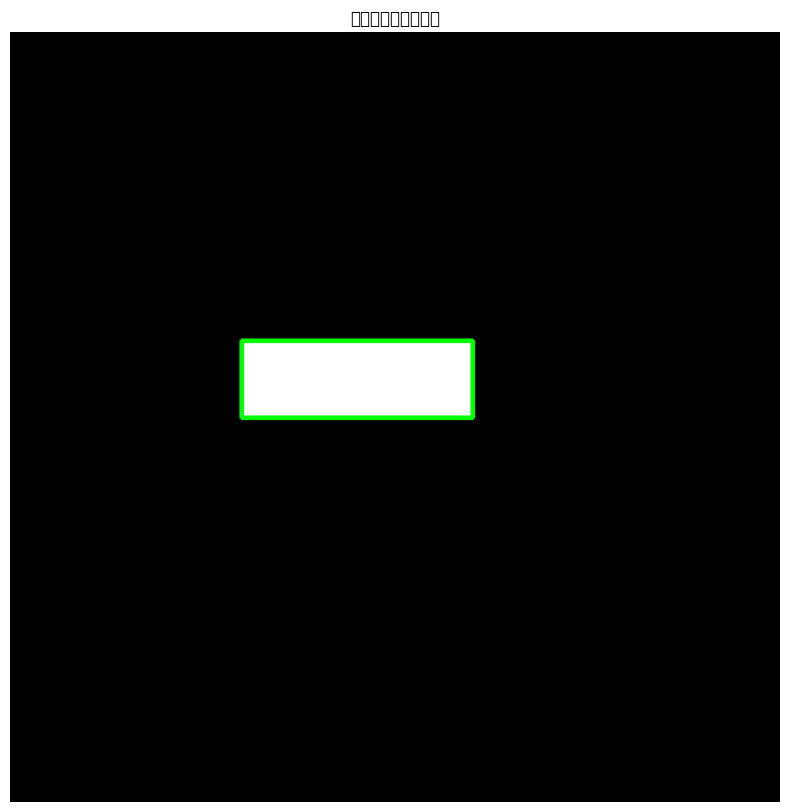

轮毂的长轴长度（像素）: 200.12
轮毂的短轴长度（像素）: 99.96
轮毂的长轴比例: 0.24
车损区域的像素面积: 7500.00
车损区域的实际面积（平方厘米）: 873.21


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 假设已有实例分割的结果mask_wheel和mask_damage
# mask_wheel 是一个二值化的图像，表示轮毂的掩码
# mask_damage 是一个二值化的图像，表示车损的掩码
mask_wheel = np.zeros((500, 500), dtype=np.uint8)
cv2.ellipse(mask_wheel, ((250, 250), (200, 100), 30), 255, -1)

mask_damage = np.zeros((500, 500), dtype=np.uint8)
cv2.rectangle(mask_damage, (150, 200), (300, 250), 255, -1)

# 找到轮毂掩码中的轮廓并拟合椭圆
contours_wheel, _ = cv2.findContours(mask_wheel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(contours_wheel) > 0:
    contour_wheel = contours_wheel[0]
    ellipse_wheel = cv2.fitEllipse(contour_wheel)
    (center, axes, angle) = ellipse_wheel
    major_axis_length = max(axes)  # 长轴长度
    minor_axis_length = min(axes)  # 短轴长度
    
    # 实际轮毂的直径
    actual_diameter_cm = 48.26  # 厘米

    # 计算透视变形比例
    pixel_major_axis_length = major_axis_length
    pixel_minor_axis_length = minor_axis_length
    
    # 实际物理尺寸比例 (长轴对应的实际物理长度)
    real_major_axis_length = actual_diameter_cm  # 轮毂的实际直径（长轴）
    
    # 计算长轴和短轴在图像中的缩放比例
    major_axis_ratio = real_major_axis_length / pixel_major_axis_length
    minor_axis_ratio = real_major_axis_length / pixel_minor_axis_length

# 找到车损掩码中的轮廓并拟合最小外接矩形
contours_damage, _ = cv2.findContours(mask_damage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(contours_damage) > 0:
    contour_damage = contours_damage[0]
    rect = cv2.minAreaRect(contour_damage)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    
    # 计算车损区域的面积
    damage_pixel_area = cv2.contourArea(contour_damage)
    
    # 计算车损区域的实际面积
    damage_actual_area = damage_pixel_area * major_axis_ratio * minor_axis_ratio
    
    # 在图像上绘制最小外接矩形
    output_image = cv2.cvtColor(mask_damage, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(output_image, [box], 0, (0, 255, 0), 2)
    
    # 显示结果
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.title('拟合的最小外接矩形')
    plt.axis('off')  # 关闭坐标轴
    plt.show()
    
    print(f"轮毂的长轴长度（像素）: {major_axis_length:.2f}")
    print(f"轮毂的短轴长度（像素）: {minor_axis_length:.2f}")
    print(f"轮毂的长轴比例: {major_axis_ratio:.2f}")
    print(f"车损区域的像素面积: {damage_pixel_area:.2f}")
    print(f"车损区域的实际面积（平方厘米）: {damage_actual_area:.2f}")
else:
    print("掩码中未找到轮廓。")
